## Join the blue and red Kasen models and plot them

In [15]:
# Initial setup...
import numpy as np
import pandas as pd
#from astropy.io import fits
#from astropy.table import Table
#import fitsio
#from scipy import interpolate
#import glob
#import math
#import os
#import sys
#import os.path
#from pathlib import Path
import h5py
import bisect
#import argparse
#from pandas.io import pytables

# v. 2.6.1 (which works with python 2.7) installed from 
#  https://imageio.readthedocs.io/en/stable/installation.html
#import imageio

import matplotlib.pyplot as plt

#%matplotlib inline

In [16]:
timer = [1.5,2.5,4.5,7.5]
z_kn = 0.0099

1.5
length of times 270
length of Lnu 1629
2.5
length of times 270
length of Lnu 1629
4.5
length of times 270
length of Lnu 1629
7.5
length of times 270
length of Lnu 1629


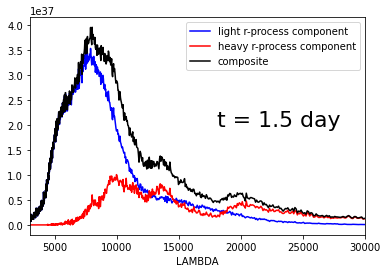

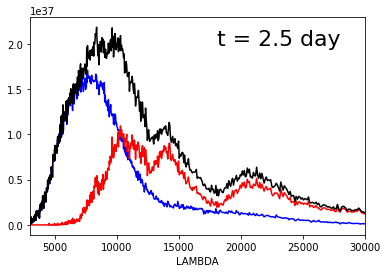

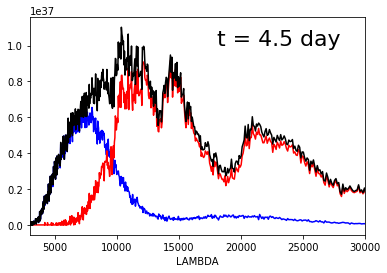

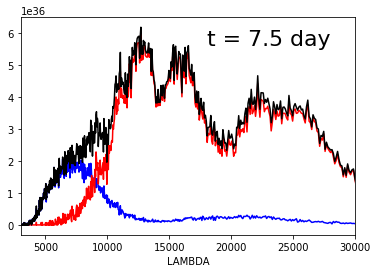

In [19]:
kasen_dirname= '/Users/mwiesner/Kasen_Kilonova_Models_2017'
fblue='/Users/mwiesner/Kasen_Kilonova_Models_2017/systematic_kilonova_model_grid/knova_d1_n10_m0.025_vk0.30_fd1.0_Xlan1e-4.0.h5'
fred = '/Users/mwiesner/Kasen_Kilonova_Models_2017/kilonova_models/knova_d1_n10_m0.040_vk0.15_Xlan1e-1.5.h5'

c = 2.99e10   # speed of light in cm/sec...


for t_kn in timer:
    
    print(t_kn)
    
    #fblue:
    f = fblue

    fin = h5py.File(f,'r')

    # frequency in Hz
    nu = np.array(fin['nu'],dtype='d')
    # array of time in seconds
    times = np.array(fin['time'])
    # convert time to days
    times = times/3600.0/24.0

    # specific luminosity (ergs/s/Hz)
    # this is a 2D array, Lnu[times][nu]
    Lnu_all   = np.array(fin['Lnu'],dtype='d')


    # index corresponding to t_kn
    it = bisect.bisect(times,t_kn)
    # spectrum at this epoch
    Lnu = Lnu_all[it,:]
    
    # Convert to in Llam (ergs/s/Angstrom)...
    lam0  = c/nu*1e8      	# rest-frame wavelength
    lam   = lam0*(1+z_kn) 	# redshifted wavelength
    Llam = Lnu*nu**2.0/c/1e8  # Llam

    df_model = pd.DataFrame({'LAMBDA0':lam0, 'LAMBDA':lam, 'Llam':Llam})

    df_model_blue = df_model.copy()

    #fred:
    f = fred

    fin = h5py.File(f,'r')

    # frequency in Hz
    nu = np.array(fin['nu'],dtype='d')
    # array of time in seconds
    times = np.array(fin['time'])
    # covert time to days
    times = times/3600.0/24.0

    # specific luminosity (ergs/s/Hz)
    # this is a 2D array, Lnu[times][nu]
    Lnu_all   = np.array(fin['Lnu'],dtype='d')


    # index corresponding to t_kn
    it = bisect.bisect(times,t_kn)
    # spectrum at this epoch
    Lnu = Lnu_all[it,:]

    # Convert to in Llam (ergs/s/Angstrom)...
    lam0  = c/nu*1e8      # rest-frame wavelength
    lam   = lam0*(1+z_kn) # redshifted wavelength
    Llam = Lnu*nu**2.0/c/1e8  # Llam

    df_model = pd.DataFrame({'LAMBDA0':lam0, 'LAMBDA':lam, 'Llam':Llam})

    df_model_red = df_model.copy()

    df_model_comb = df_model_blue.copy()

    df_model_comb['Llam'] = df_model_comb['Llam'] + df_model_red['Llam']
        
    if t_kn < 2:
        this = max(df_model_comb['Llam'])/2
        chooser = True
        df_model_comb.to_csv('output/blue_red.csv', index=False)
    #Skip over Lnu to Llam in other code
    
    else:
        this = max(df_model_comb['Llam'])/1.1
        chooser = False
        
    ax = df_model_blue.plot('LAMBDA','Llam', color='blue', label='light r-process component',xlim=[3000.,30000.], legend = chooser)
  #  df_model_blue.plot('LAMBDA', 'Llam', ax=ax, xlim=[3000.,30000.], label='light r-process component')
    df_model_red.plot('LAMBDA', 'Llam', color='red', ax=ax, label='heavy r-process component', legend = chooser)
    df_model_comb.plot('LAMBDA', 'Llam', color='black', ax=ax, label = 'composite', legend = chooser)
 
    plt.annotate('t = '+str(t_kn)+' day', (28000, this), horizontalalignment='right', fontsize=22)
